<a href="https://colab.research.google.com/github/abhayforML/Portfolio-for-Sustainability/blob/main/Case2_ESG_opt_Nifty_drop_controversy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This is Case2 - Controveries can create a significant drop in the stock prices. Also they can potentially impact the reputation of the company.
##Drop controversial stocks
###In this case we will see the impact of removing Stocks with higher controversy risk (>=4) and check what is the portfolio return. The other ESG wts are still considerd. The scope is entire Nifty to begin with.

##Step0: Imports, PIP install yfinance

In [1]:
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
#from yahoo_fin.stock_info import *
import datetime
from datetime import datetime
import requests
import io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 418 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


##Step1: Collect data for ESG risk scores of Nifty 50 stocks
###Sort by ESG risk
###ESG Risk = ESG Rating + Controversy
###Higher the score, higher the risk (Differnt agencies give diff kind of ratings)

In [2]:
#url of project data
url = 'https://raw.githubusercontent.com/abhayforML/Portfolio-for-Sustainability/main/esg-all-v1.csv'
download = requests.get(url).content

#create esg_ratings - a df of pandas
esg_ratings = pd.read_csv(io.StringIO(download.decode('utf-8')))
#Check nulls
print(esg_ratings.isnull().sum())
print('\n')
print('Sorted_esg is stocks sorted in their ascending esg risk rating')
print('\n')
sorted_esg = esg_ratings.sort_values(by=["ESG+CONT"], ascending=True)
print(sorted_esg.index)
print('\n')
print(esg_ratings)

STOCK              0
ESG RISK RATING    0
CONTROVERSY        0
ESG+CONT           0
dtype: int64


Sorted_esg is stocks sorted in their ascending esg risk rating


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 26, 24, 25, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 47, 49],
           dtype='int64')


         STOCK  ESG RISK RATING  CONTROVERSY  ESG+CONT
0   HEROMOTOCO            12.00            1     13.00
1        TECHM            12.00            1     13.00
2        WIPRO            13.00            2     15.00
3    EICHERMOT            13.00            2     15.00
4      HCLTECH            13.00            2     15.00
5   ADANIPORTS            12.00            4     16.00
6          TCS            14.00            2     16.00
7        TITAN            15.00            2     17.00
8         INFY            15.00            2     17.00
9   BAJAJ-AUTO       

##Step1A: Drop Controversial stocks where Controvery >= 4

In [3]:
esg_ratings[esg_ratings.CONTROVERSY >= 4]


,STOCK,ESG RISK RATING,CONTROVERSY,ESG+CONT
5,ADANIPORTS,12.00,4,16.00
19,UPL,24.00,4,28.00
24,MARUTI,26.00,4,30.00
45,NTPC,37.00,4,41.00
46,ADANIENT,36.41,5,41.41
49,ONGC,55.00,5,60.00


In [4]:
esg_ratings = esg_ratings.drop(index=[5, 19, 24, 45, 46, 49])
esg_ratings 
esg_ratings.shape
sorted_esg = esg_ratings.sort_values(by=["ESG+CONT"], ascending=True)

##Step2: Collect prices data for 50 stocks (minus 6 we removed)
###Data is collected from Yfinance API for 10 years monthly Adj close
###Idea is to see portfolio optimization with and without ESG risk




In [5]:
#We can convert this to take only part of the 50 stocks e.g. [:10] for 10 stocks
top_esg = sorted_esg['STOCK'][:]
top_esg
l1=""
for stock in top_esg:
    l1 = l1+" "+stock+".NS"
data = yf.download(l1,start="2012-04-01",end='2022-04-30', interval="1mo")
data
print(type(data))

[*********************100%***********************]  44 of 44 completed
<class 'pandas.core.frame.DataFrame'>


##Take only Adj Close prices


In [6]:
#cp is the base data below
cp = data['Adj Close']
print(cp)
print(type(cp))
print(cp.columns)
print(len(cp.columns))
cp.to_csv('/content/cp.csv')

            APOLLOHOSP.NS  ASIANPAINT.NS  AXISBANK.NS  BAJAJ-AUTO.NS  \
Date                                                                   
2012-04-01     601.516541     323.914062   206.426529    1208.879883   
2012-05-01     639.161987     369.353729   181.064941    1124.750854   
2012-06-01     589.063416     357.138611   189.419342    1170.480469   
2012-07-01     601.325623     337.211578   197.744141    1193.885010   
2012-08-01     603.652527     337.063507   187.829956    1238.692749   
...                   ...            ...          ...            ...   
2021-12-01    4999.718750    3358.719727   677.518677    3131.631592   
2022-01-01    4445.186523    3129.671875   771.875061    3435.614502   
2022-02-01    4789.693359    3151.911621   741.271667    3402.556396   
2022-03-01    4503.776367    3057.889893   759.993164    3520.766357   
2022-04-01    4442.194824    3214.013672   727.492615    3594.545410   

            BAJAJFINSV.NS  BAJFINANCE.NS  BHARTIARTL.NS     BPC

##Step3: Data Exploration : Check NaN and Nulls

In [7]:
#Use either one of the methods
#print(np.isnan(cp).sum())
#print('\n')
#print(cp.isnull().sum())
#print('\n')
print(cp.isna().sum())

APOLLOHOSP.NS     0
ASIANPAINT.NS     0
AXISBANK.NS       0
BAJAJ-AUTO.NS     0
BAJAJFINSV.NS     0
BAJFINANCE.NS     0
BHARTIARTL.NS     0
BPCL.NS           0
BRITANNIA.NS      0
CIPLA.NS          0
COALINDIA.NS      0
DIVISLAB.NS       0
DRREDDY.NS        0
EICHERMOT.NS      0
GRASIM.NS         0
HCLTECH.NS        0
HDFC.NS           0
HDFCBANK.NS       0
HDFCLIFE.NS      68
HEROMOTOCO.NS     0
HINDALCO.NS       0
HINDUNILVR.NS     0
ICICIBANK.NS      0
INDUSINDBK.NS     0
INFY.NS           0
ITC.NS            0
JSWSTEEL.NS       0
KOTAKBANK.NS      0
LT.NS             0
M&M.NS            0
NESTLEIND.NS      0
POWERGRID.NS      0
RELIANCE.NS       0
SBILIFE.NS       67
SBIN.NS           0
SUNPHARMA.NS      0
TATACONSUM.NS     0
TATAMOTORS.NS     0
TATASTEEL.NS      0
TCS.NS            0
TECHM.NS          0
TITAN.NS          0
ULTRACEMCO.NS     0
WIPRO.NS          0
dtype: int64


##Step4: Data Exploration : Remove stocks with NaNs / Nulls after checking multiple values are blank for a stock

In [8]:
#Check which stocks are culprits, which is also found in the esrlier results
c=0
l=[]
for i in cp.columns:
    if np.isnan(cp[i][0])==True:
        c=c+1
        l.append(i)
print(c)
print(l)
print("Need to remove these stocks")

2
['HDFCLIFE.NS', 'SBILIFE.NS']
Need to remove these stocks


In [9]:
print(cp.columns)
cp = cp.drop(columns=['HDFCLIFE.NS', 'SBILIFE.NS'])
#drop has inplace default as False so assign it to cp to get one with dropped columns
print('\n Dropped 2 stocks')
print(cp.columns)
#Save it to a new csv for future use
cp.to_csv('/content/cp.csv')
print(len(cp.columns))
print(cp.index)

Index(['APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS',
       'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BPCL.NS',
       'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS',
       'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS',
       'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS',
       'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS',
       'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'NESTLEIND.NS', 'POWERGRID.NS',
       'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS',
       'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS',
       'ULTRACEMCO.NS', 'WIPRO.NS'],
      dtype='object')

 Dropped 2 stocks
Index(['APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS',
       'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BPCL.NS',
       'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS',
       'EICHERMOT.NS', 'GRA

##Step5: Drop the Stock/s from ESG Dataframe also

In [10]:
print(esg_ratings[:])
print(len(esg_ratings))

         STOCK  ESG RISK RATING  CONTROVERSY  ESG+CONT
0   HEROMOTOCO            12.00            1     13.00
1        TECHM            12.00            1     13.00
2        WIPRO            13.00            2     15.00
3    EICHERMOT            13.00            2     15.00
4      HCLTECH            13.00            2     15.00
6          TCS            14.00            2     16.00
7        TITAN            15.00            2     17.00
8         INFY            15.00            2     17.00
9   BAJAJ-AUTO            16.00            1     17.00
10    DIVISLAB            17.90            2     19.90
11  BAJFINANCE            19.49            1     20.49
12        HDFC            19.00            2     21.00
13    HDFCLIFE            20.01            1     21.01
14  BHARTIARTL            20.00            3     23.00
15   KOTAKBANK            23.00            2     25.00
16     SBILIFE            25.66            1     26.66
17   POWERGRID            26.49            1     27.49
18   BRITA

In [11]:
print(esg_ratings.shape)
#we need to remove the same stocks from esg_ratings df
esg_ratings = esg_ratings.drop(index=[13, 16])
print(esg_ratings.shape)
esg_ratings.to_csv('/content/esg_ratings.csv')

(44, 4)
(42, 4)


##Step6: Calculate returns(monthly) from historical data for these stocks.
###So portfolio is cp

In [12]:
print('\n')
print(cp.info())
#Check nulls again
#print(cp.isnull().sum())
cp_rtn = cp.pct_change().dropna()
print(cp_rtn)



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2012-04-01 to 2022-04-01
Freq: MS
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   APOLLOHOSP.NS  121 non-null    float64
 1   ASIANPAINT.NS  121 non-null    float64
 2   AXISBANK.NS    121 non-null    float64
 3   BAJAJ-AUTO.NS  121 non-null    float64
 4   BAJAJFINSV.NS  121 non-null    float64
 5   BAJFINANCE.NS  121 non-null    float64
 6   BHARTIARTL.NS  121 non-null    float64
 7   BPCL.NS        121 non-null    float64
 8   BRITANNIA.NS   121 non-null    float64
 9   CIPLA.NS       121 non-null    float64
 10  COALINDIA.NS   121 non-null    float64
 11  DIVISLAB.NS    121 non-null    float64
 12  DRREDDY.NS     121 non-null    float64
 13  EICHERMOT.NS   121 non-null    float64
 14  GRASIM.NS      121 non-null    float64
 15  HCLTECH.NS     121 non-null    float64
 16  HDFC.NS        121 non-null    float64
 17  HDFCBANK.NS    121 non-n

##Step7: Visualize growth of Stocks in 10 years

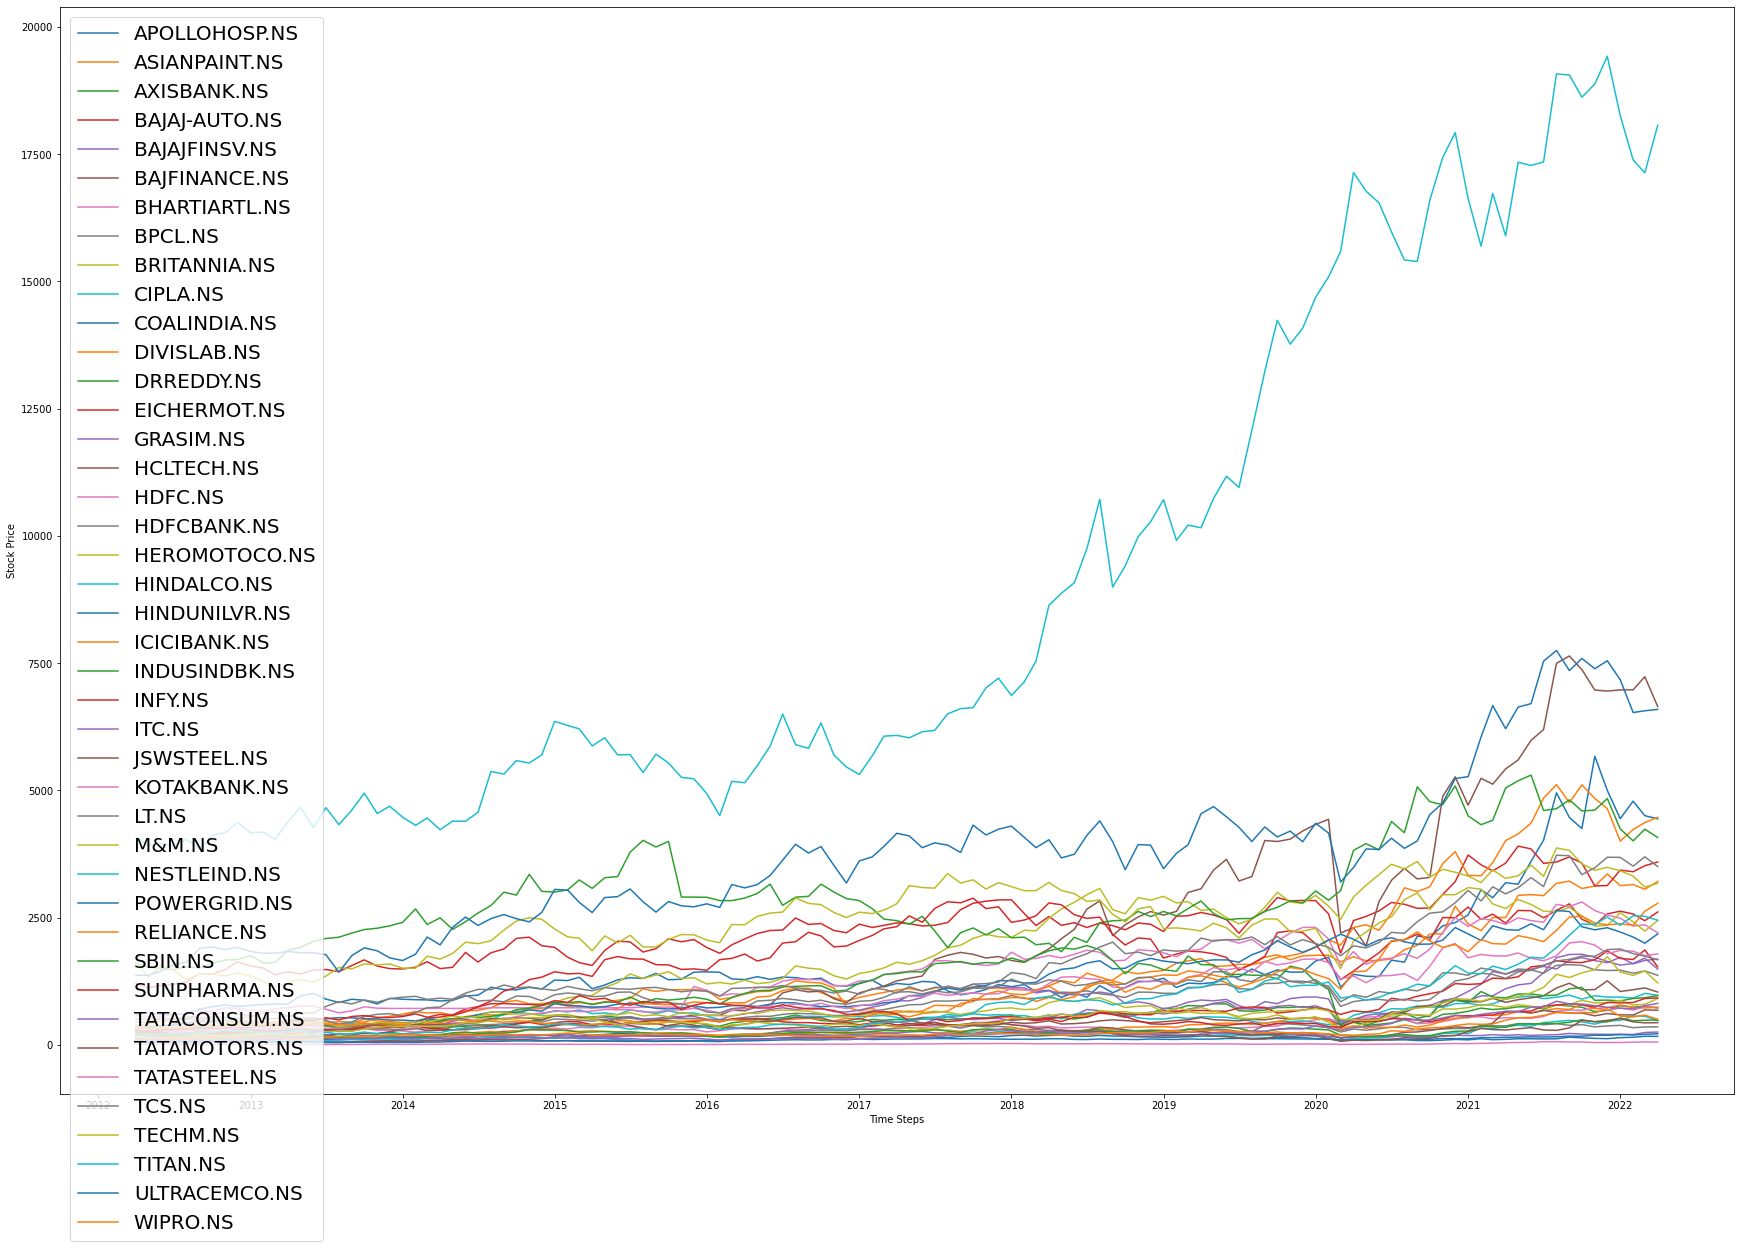

In [13]:
fig, ax = plt.subplots(figsize=(30,20))
for i in cp.columns:    
    plt.plot(cp[i])
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend(cp.columns,loc=2, prop={'size': 20})
plt.show()

##Step8: Log returns are more stable, so calculate the log returns
###Annualize it

In [14]:
mthly_log_rtn = np.log(cp) - np.log(cp.shift(1))
mthly_log_rtn = mthly_log_rtn.dropna()
mthly_log_rtn

,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SBIN.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-01,0.060704,0.131277,-0.131089,-0.072133,-0.109667,-0.028321,-0.025937,0.039470,-0.049534,-0.006753,...,-0.039131,-0.061812,-0.082898,-0.306443,-0.138582,-0.001004,-0.041015,-0.045213,-0.000737,0.012147
2012-06-01,-0.081624,-0.033631,0.045108,0.039853,0.042766,0.071603,0.008229,0.064256,-0.017548,0.021232,...,0.066923,0.114613,0.074738,0.039757,0.089517,0.025450,0.050305,0.003138,0.063041,-0.024943
2012-07-01,0.020603,-0.057413,0.043011,0.019798,0.084377,0.128629,-0.016527,-0.023598,-0.122780,0.067339,...,-0.073951,0.027612,0.091028,-0.069155,-0.063112,-0.020400,0.006754,-0.006512,0.078047,-0.152051
2012-08-01,0.003862,-0.000439,-0.051437,0.036844,0.069162,0.024028,-0.191327,-0.067442,0.091966,0.105966,...,-0.087369,0.022391,0.021808,0.052827,-0.108325,0.079869,0.113239,0.000610,0.032581,0.064208
2012-09-01,0.151419,0.077684,0.135747,0.123674,0.110465,0.117418,0.072575,0.040529,-0.051714,0.015573,...,0.198419,0.046067,0.112464,0.132704,0.103726,-0.036258,0.202057,0.169878,0.154567,0.049630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,-0.126201,0.073364,0.034331,0.002758,-0.049419,-0.002855,-0.062979,0.052570,0.016920,-0.028403,...,-0.000217,0.115303,-0.046196,0.050595,0.036886,0.057587,0.159703,0.060003,0.020939,0.115610
2022-01-01,-0.117560,-0.070632,0.130386,0.092642,-0.044664,0.003284,0.064420,0.029651,-0.019801,0.000953,...,0.156212,-0.013332,-0.021962,0.070719,-0.023579,-0.000562,-0.191157,-0.066422,-0.050614,-0.222585
2022-02-01,0.074645,0.007081,-0.040456,-0.009669,0.020378,0.000293,-0.060479,-0.126701,-0.030982,-0.021337,...,-0.107985,0.011201,-0.012034,-0.131285,0.117379,-0.048197,-0.047776,0.075951,-0.094162,-0.028152


In [15]:
avg_mthly_log_rtn = mthly_log_rtn.mean()            #Avg of 10 years
avg_mthly_log_rtn
ann_rtn = avg_mthly_log_rtn*12
ann_rtn                                             #Based on monthly avg rtn of 10 years 
print(ann_rtn.index)

Index(['APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS',
       'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BPCL.NS',
       'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS',
       'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS',
       'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS',
       'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS',
       'LT.NS', 'M&M.NS', 'NESTLEIND.NS', 'POWERGRID.NS', 'RELIANCE.NS',
       'SBIN.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS',
       'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS',
       'WIPRO.NS'],
      dtype='object')


##Step9: Calculate Annual Variance, SD and then Covariance

In [16]:
mthly_rtn_var = mthly_log_rtn.var(ddof=0) # ddof=0 for population, ddof = 1 for sample
ann_rtn_var = mthly_rtn_var*12         # monthly to annual conversion
ann_rtn_sd = np.sqrt(ann_rtn_var)
print(ann_rtn_var.index)
print(ann_rtn_sd.index)

Index(['APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS',
       'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BPCL.NS',
       'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS',
       'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS',
       'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS',
       'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS',
       'LT.NS', 'M&M.NS', 'NESTLEIND.NS', 'POWERGRID.NS', 'RELIANCE.NS',
       'SBIN.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS',
       'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS',
       'WIPRO.NS'],
      dtype='object')
Index(['APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS',
       'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BPCL.NS',
       'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS',
       'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS',

In [17]:
cov_matrix_mthly = mthly_log_rtn.cov(ddof=0) # ddof=0 for population, ddof = 1 for sample
cov_matrix_mthly
cov_matrix_ann = cov_matrix_mthly*12
cov_matrix_ann


,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SBIN.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
APOLLOHOSP.NS,0.115108,0.012494,0.040004,0.022922,0.036894,0.056728,0.018655,0.014119,0.021262,0.013761,...,0.019330,0.025744,0.024471,0.032237,0.008366,0.013624,0.018944,0.026722,0.025665,0.021365
ASIANPAINT.NS,0.012494,0.058086,0.026389,0.012797,0.019963,0.027234,0.015894,0.030208,0.019109,0.005885,...,0.022725,0.007034,0.022258,0.010307,0.002310,0.009696,0.012620,0.027766,0.027371,0.010438
AXISBANK.NS,0.040004,0.026389,0.132301,0.053673,0.081828,0.098669,0.038638,0.074236,0.023892,0.004720,...,0.095039,0.014976,0.043349,0.097413,0.067187,0.005880,0.030878,0.051940,0.048542,-0.000034
BAJAJ-AUTO.NS,0.022922,0.012797,0.053673,0.071732,0.045315,0.045401,0.027978,0.045544,0.022382,0.024860,...,0.038804,0.020519,0.037449,0.073181,0.038450,0.011948,0.018452,0.027167,0.035373,0.007350
BAJAJFINSV.NS,0.036894,0.019963,0.081828,0.045315,0.156270,0.124660,0.035223,0.065097,0.026644,0.011756,...,0.078182,0.009011,0.045753,0.079461,0.072540,0.005512,0.038370,0.056221,0.050220,0.013659
BAJFINANCE.NS,0.056728,0.027234,0.098669,0.045401,0.124660,0.166721,0.035862,0.062239,0.036041,-0.004605,...,0.082714,0.009406,0.039043,0.079269,0.066692,0.003558,0.026400,0.061688,0.051257,-0.000064
BHARTIARTL.NS,0.018655,0.015894,0.038638,0.027978,0.035223,0.035862,0.082602,0.040097,0.013475,0.016741,...,0.034943,0.017062,0.039036,0.034856,0.023586,0.005421,-0.001482,0.025453,0.030892,0.005519
BPCL.NS,0.014119,0.030208,0.074236,0.045544,0.065097,0.062239,0.040097,0.119654,0.020087,0.006290,...,0.067567,0.004121,0.037891,0.067108,0.040543,0.000279,0.010630,0.036330,0.050885,0.001508
BRITANNIA.NS,0.021262,0.019109,0.023892,0.022382,0.026644,0.036041,0.013475,0.020087,0.059003,0.016719,...,0.007654,0.016617,0.020681,0.024656,0.000766,0.013637,0.005498,0.020934,0.015823,0.000776
CIPLA.NS,0.013761,0.005885,0.004720,0.024860,0.011756,-0.004605,0.016741,0.006290,0.016719,0.066502,...,-0.000491,0.035613,0.025868,0.027000,0.008448,0.015475,0.007712,0.005031,0.010928,0.018670


##Step10: Assign equal weight for now, also get ready with ESG wts
###Make a PORTFOLIO df and add Rtn, Wts

In [18]:
PORTFOLIO = pd.DataFrame()
PORTFOLIO['Rtn'] = ann_rtn
PORTFOLIO['SD'] = ann_rtn_sd
PORTFOLIO

,Rtn,SD
APOLLOHOSP.NS,0.199945,0.339275
ASIANPAINT.NS,0.229480,0.241011
AXISBANK.NS,0.125966,0.363731
BAJAJ-AUTO.NS,0.108972,0.267828
BAJAJFINSV.NS,0.304242,0.395310
BAJFINANCE.NS,0.441265,0.408315
BHARTIARTL.NS,0.100467,0.287406
BPCL.NS,0.169752,0.345911
BRITANNIA.NS,0.258592,0.242906
CIPLA.NS,0.118984,0.257880


In [19]:
equal_weights = [1/ann_rtn.shape[0] for i in range(ann_rtn.shape[0])]
PORTFOLIO['Wts'] = pd.Series(equal_weights, index=ann_rtn.index)
PORTFOLIO

,Rtn,SD,Wts
APOLLOHOSP.NS,0.199945,0.339275,0.02381
ASIANPAINT.NS,0.229480,0.241011,0.02381
AXISBANK.NS,0.125966,0.363731,0.02381
BAJAJ-AUTO.NS,0.108972,0.267828,0.02381
BAJAJFINSV.NS,0.304242,0.395310,0.02381
BAJFINANCE.NS,0.441265,0.408315,0.02381
BHARTIARTL.NS,0.100467,0.287406,0.02381
BPCL.NS,0.169752,0.345911,0.02381
BRITANNIA.NS,0.258592,0.242906,0.02381
CIPLA.NS,0.118984,0.257880,0.02381


##Step11: Add ESG Risk from esg_ratings
###Note the index...its diff
###Note '.NS' absence

In [20]:
esg_ratings

,STOCK,ESG RISK RATING,CONTROVERSY,ESG+CONT
0,HEROMOTOCO,12.00,1,13.00
1,TECHM,12.00,1,13.00
2,WIPRO,13.00,2,15.00
3,EICHERMOT,13.00,2,15.00
4,HCLTECH,13.00,2,15.00
6,TCS,14.00,2,16.00
7,TITAN,15.00,2,17.00
8,INFY,15.00,2,17.00
9,BAJAJ-AUTO,16.00,1,17.00
10,DIVISLAB,17.90,2,19.90


In [21]:
print(esg_ratings.shape)
esg_ratings['STOCK'] = esg_ratings['STOCK'] + '.NS'
print(esg_ratings)

(42, 4)
            STOCK  ESG RISK RATING  CONTROVERSY  ESG+CONT
0   HEROMOTOCO.NS            12.00            1     13.00
1        TECHM.NS            12.00            1     13.00
2        WIPRO.NS            13.00            2     15.00
3    EICHERMOT.NS            13.00            2     15.00
4      HCLTECH.NS            13.00            2     15.00
6          TCS.NS            14.00            2     16.00
7        TITAN.NS            15.00            2     17.00
8         INFY.NS            15.00            2     17.00
9   BAJAJ-AUTO.NS            16.00            1     17.00
10    DIVISLAB.NS            17.90            2     19.90
11  BAJFINANCE.NS            19.49            1     20.49
12        HDFC.NS            19.00            2     21.00
14  BHARTIARTL.NS            20.00            3     23.00
15   KOTAKBANK.NS            23.00            2     25.00
17   POWERGRID.NS            26.49            1     27.49
18   BRITANNIA.NS            26.74            1     27.74
20  HI

##Step12: Change index of esg_ratings48
###This step can only run once
###Add column to PORTFOLIO

In [22]:
esg_ratings = esg_ratings.set_index('STOCK')
PORTFOLIO = PORTFOLIO.loc[esg_ratings.index]
PORTFOLIO['ESG_risk'] = esg_ratings['ESG+CONT']
PORTFOLIO

,Rtn,SD,Wts,ESG_risk
STOCK,,,,
HEROMOTOCO.NS,0.040602,0.279736,0.02381,13.00
TECHM.NS,0.215725,0.299147,0.02381,13.00
WIPRO.NS,0.130310,0.269551,0.02381,15.00
EICHERMOT.NS,0.257336,0.316147,0.02381,15.00
HCLTECH.NS,0.230843,0.264621,0.02381,15.00
TCS.NS,0.193025,0.228208,0.02381,16.00
TITAN.NS,0.242022,0.323185,0.02381,17.00
INFY.NS,0.185790,0.267107,0.02381,17.00
BAJAJ-AUTO.NS,0.108972,0.267828,0.02381,17.00


##Step13: Move towards Sharpe's ratio and portfolio Rtn and SD
###ESG Multiplier = reciprocal of ESG Risk. Convert it to ESG Wts
###ESG Wts = ESG Multiplier / sum(ESG Multiplier)
###So Total of ESG Wts is 1

In [23]:
esg_risk = esg_ratings['ESG+CONT'].to_list()
print('Original ESG risk : ', esg_risk)
esg_multiplier = list(map(lambda x:round((1/x),4), esg_risk))
print('ESG multiplier : ', esg_multiplier)
multipler_sum = 0
multipler_sum = sum(esg_multiplier)
print('Total of Multiplier : ', multipler_sum)
esg_wt = list(map(lambda x:x/multipler_sum, esg_multiplier))
print('ESG Wts : ', esg_wt)
print('Total of ESG Wts : ', sum(esg_wt))
PORTFOLIO['ESG_Multiplier'] = pd.Series(esg_multiplier, index=esg_ratings.index)
PORTFOLIO['ESG_Wts'] = pd.Series(esg_wt, index=esg_ratings.index)
PORTFOLIO

Original ESG risk :  [13.0, 13.0, 15.0, 15.0, 15.0, 16.0, 17.0, 17.0, 17.0, 19.9, 20.49, 21.0, 23.0, 25.0, 27.49, 27.74, 28.0, 28.0, 28.0, 29.0, 30.0, 30.0, 30.22, 30.24, 32.0, 32.0, 32.0, 32.75, 33.0, 33.0, 33.45, 35.0, 36.0, 37.0, 37.0, 38.0, 38.0, 39.0, 39.0, 39.0, 45.0, 45.0]
ESG multiplier :  [0.0769, 0.0769, 0.0667, 0.0667, 0.0667, 0.0625, 0.0588, 0.0588, 0.0588, 0.0503, 0.0488, 0.0476, 0.0435, 0.04, 0.0364, 0.036, 0.0357, 0.0357, 0.0357, 0.0345, 0.0333, 0.0333, 0.0331, 0.0331, 0.0312, 0.0312, 0.0312, 0.0305, 0.0303, 0.0303, 0.0299, 0.0286, 0.0278, 0.027, 0.027, 0.0263, 0.0263, 0.0256, 0.0256, 0.0256, 0.0222, 0.0222]
Total of Multiplier :  1.6685999999999994
ESG Wts :  [0.04608653961404772, 0.04608653961404772, 0.03997363058851733, 0.03997363058851733, 0.03997363058851733, 0.037456550401534235, 0.03523912261776341, 0.03523912261776341, 0.03523912261776341, 0.03014503176315475, 0.02924607455351793, 0.028526908785808474, 0.026069759079467826, 0.02397219225698191, 0.0218146949538535

,Rtn,SD,Wts,ESG_risk,ESG_Multiplier,ESG_Wts
STOCK,,,,,,
HEROMOTOCO.NS,0.040602,0.279736,0.02381,13.00,0.0769,0.046087
TECHM.NS,0.215725,0.299147,0.02381,13.00,0.0769,0.046087
WIPRO.NS,0.130310,0.269551,0.02381,15.00,0.0667,0.039974
EICHERMOT.NS,0.257336,0.316147,0.02381,15.00,0.0667,0.039974
HCLTECH.NS,0.230843,0.264621,0.02381,15.00,0.0667,0.039974
TCS.NS,0.193025,0.228208,0.02381,16.00,0.0625,0.037457
TITAN.NS,0.242022,0.323185,0.02381,17.00,0.0588,0.035239
INFY.NS,0.185790,0.267107,0.02381,17.00,0.0588,0.035239
BAJAJ-AUTO.NS,0.108972,0.267828,0.02381,17.00,0.0588,0.035239


##Step14: Calculation of Portfolio Return and Risk for equal weights

In [24]:
Rtn_portfolio = np.dot((PORTFOLIO['Wts'].values).T, PORTFOLIO['Rtn'].values)
print(Rtn_portfolio*100)
SD_portfolio = np.sqrt(np.dot((PORTFOLIO['Wts'].values).T, np.dot(cov_matrix_ann.values, PORTFOLIO['Wts'].values)))
print(SD_portfolio*100)

16.542502877768097
17.009529643152618


##Step15: Calculation of Portfolio Return and Risk with ESG weights

In [25]:
Rtn_portfolio_esg = np.dot((PORTFOLIO['ESG_Wts'].values).T, PORTFOLIO['Rtn'].values)
print(Rtn_portfolio_esg*100)
SD_portfolio_esg = np.sqrt(np.dot((PORTFOLIO['ESG_Wts'].values).T, np.dot(cov_matrix_ann.values, PORTFOLIO['ESG_Wts'].values)))
print(SD_portfolio_esg*100)

17.164698035091266
17.294524291811697


###Important Comment: There is a difference of .6% between Portfolio Returns with or without ESG Wts. Using ESG Wts is good.

##Step16: Optimize Sharpe ratio with or without ESG
###Optimization Solver will always give the same best weights
###We don't need to run it twice

In [26]:
import scipy
from scipy.optimize import minimize, Bounds
# objective function for Optimization
def sharpe_ratio(weights, covar_matrix, annual_returns, Rf=0.0588, sign=-1.0):
  std = np.sqrt(np.dot(np.dot(weights.T, covar_matrix), weights))
  mean = np.dot(weights.T, annual_returns)
  sharpe = (mean - Rf)/std
  return sign*sharpe # multiplied by -1 because scipy don't have maximize function

def constraint(weights):
  return weights.sum() - 1

cons = [{'type': 'eq', 'fun': constraint}]
bnds = Bounds(np.zeros(42),np.ones(42))

#Start with Equal weights - Call the function here
sol = minimize(sharpe_ratio, equal_weights, args=(cov_matrix_ann.values, ann_rtn.values), method='SLSQP', constraints=cons, bounds=bnds)
sol

np.round_(sol.x, decimals=4)
print(np.round_(sol.x, decimals=4))

[0.     0.0967 0.     0.     0.     0.1444 0.     0.     0.1473 0.
 0.     0.1771 0.     0.     0.     0.093  0.     0.     0.     0.
 0.1407 0.     0.     0.0232 0.     0.0216 0.     0.     0.     0.
 0.0038 0.0464 0.     0.     0.     0.     0.     0.1059 0.     0.
 0.     0.    ]


###Step17: Optimized Sharpe ratio with weights

In [27]:
PORTFOLIO['Opt_wt'] = pd.Series(np.round_(sol.x, decimals=4), index=esg_ratings.index)
PORTFOLIO[['Rtn', 'SD', 'ESG_Wts', 'Opt_wt']]

,Rtn,SD,ESG_Wts,Opt_wt
STOCK,,,,
HEROMOTOCO.NS,0.040602,0.279736,0.046087,0.0000
TECHM.NS,0.215725,0.299147,0.046087,0.0967
WIPRO.NS,0.130310,0.269551,0.039974,0.0000
EICHERMOT.NS,0.257336,0.316147,0.039974,0.0000
HCLTECH.NS,0.230843,0.264621,0.039974,0.0000
TCS.NS,0.193025,0.228208,0.037457,0.1444
TITAN.NS,0.242022,0.323185,0.035239,0.0000
INFY.NS,0.185790,0.267107,0.035239,0.0000
BAJAJ-AUTO.NS,0.108972,0.267828,0.035239,0.1473


##Step18: Result Case2

In [28]:
# Use Optimized weights now
wi = np.array(PORTFOLIO['Opt_wt'])
rtn = np.array(PORTFOLIO['Rtn'])
Sharpe_opt = sharpe_ratio(wi, cov_matrix_ann.values, rtn, sign=1.0)

# Use ESG weights now
wi = np.array(PORTFOLIO['ESG_Wts'])
rtn = np.array(PORTFOLIO['Rtn'])
Sharpe_ESG = sharpe_ratio(wi, cov_matrix_ann.values, rtn, sign=1.0)

# Use Optimized weights now
wi = np.array(PORTFOLIO['Wts'])
rtn = np.array(PORTFOLIO['Rtn'])
Sharpe_Eq_Wts = sharpe_ratio(wi, cov_matrix_ann.values, rtn, sign=1.0)

In [29]:
print('Result of Case2 - Dropping Controversial Stocks')
print('------------------------------------------------------------------------------------------------------------')
Rtn_portfolio_opt_wt = np.dot((PORTFOLIO['Opt_wt'].values).T, PORTFOLIO['Rtn'].values)
print('Nifty Portfolio Rtn using Opt wts    = {0:8.4f}%'.format(Rtn_portfolio_opt_wt*100))
SD_portfolio_opt_wt = np.sqrt(np.dot((PORTFOLIO['Opt_wt'].values).T, np.dot(cov_matrix_ann.values, PORTFOLIO['Opt_wt'].values)))
print('Nifty Portfolio SD using Opt wts     = {0:8.4f}%'.format(SD_portfolio_opt_wt*100))
print('Sharpe ratio from optimized wts      = {0:8.4f}'.format(Sharpe_opt))
print('This is the optimum portfolio')
print('\n')
Rtn_portfolio_esg_wt = np.dot((PORTFOLIO['ESG_Wts'].values).T, PORTFOLIO['Rtn'].values)
print('Nifty Portfolio Rtn using ESG Wts    = {0:8.4f}%'.format(Rtn_portfolio_esg_wt*100))
SD_portfolio_esg_wt = np.sqrt(np.dot((PORTFOLIO['ESG_Wts'].values).T, np.dot(cov_matrix_ann.values, PORTFOLIO['ESG_Wts'].values)))
print('Nifty Portfolio SD using ESG Wts     = {0:8.4f}%'.format(SD_portfolio_esg_wt*100))
print('Sharpe ratio from ESG wts            = {0:8.4f}'.format(Sharpe_ESG))
print('\n')
Rtn_portfolio_equal_wt = np.dot((PORTFOLIO['Wts'].values).T, PORTFOLIO['Rtn'].values)
print('Nifty Portfolio Rtn using Equal Wts  = {0:8.4f}%'.format(Rtn_portfolio_equal_wt*100))
SD_portfolio_equal_wt = np.sqrt(np.dot((PORTFOLIO['Wts'].values).T, np.dot(cov_matrix_ann.values, PORTFOLIO['Wts'].values)))
print('Nifty Portfolio SD using Equal Wts   = {0:8.4f}%'.format(SD_portfolio_equal_wt*100))
print('Sharpe ratio from Equal wts          = {0:8.4f}'.format(Sharpe_Eq_Wts))
print('------------------------------------------------------------------------------------------------------------')

Result of Case2 - Dropping Controversial Stocks
------------------------------------------------------------------------------------------------------------
Nifty Portfolio Rtn using Opt wts    =  15.8403%
Nifty Portfolio SD using Opt wts     =  14.9070%
Sharpe ratio from optimized wts      =   0.6682
This is the optimum portfolio


Nifty Portfolio Rtn using ESG Wts    =  17.1647%
Nifty Portfolio SD using ESG Wts     =  17.2945%
Sharpe ratio from ESG wts            =   0.6525


Nifty Portfolio Rtn using Equal Wts  =  16.5425%
Nifty Portfolio SD using Equal Wts   =  17.0095%
Sharpe ratio from Equal wts          =   0.6269
------------------------------------------------------------------------------------------------------------
